In [1]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from matplotlib import pyplot as plt
import cmath

# Problem 1

In [236]:
def truncated_svd(A,k=None):
    n=len(A[0,:])
    m=len(A[:,0])
    eigvals=la.eig(np.dot(A.T,A))[0]
    eigvecs=la.eig(np.dot(A.T,A))[1].T
    eigsort=eigvals.argsort()[::-1]
    eigvals=eigvals[eigsort]
    sing=np.sqrt(eigvals)
    r=len(eigvals)    
    V=np.random.randn(n,r)
    for i in range(r):
        V[:,i]=eigvecs[i]
    V=V[:,eigsort]
    Sigma=np.diag(sing)
    U=np.random.randn(m,r)
    for j in range(r):
        U[:,j]=np.dot(A,V[:,j])/Sigma[j,j]
    if k!=None:
        V=V[:,:k]
        Sigma=Sigma[:k,:k]
        U=U[:,:k]
    return U, Sigma, V
A=np.random.randn(4,4)
U,Sigma,V=truncated_svd(A)
Sigma,np.dot(U.T,U), np.dot(np.dot(U,Sigma),V.T)-A, np.dot(V.T,V)

/Users/hqdhftw/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


(array([[ 3.05564645+0.j,  0.00000000+0.j,  0.00000000+0.j,  0.00000000+0.j],
        [ 0.00000000+0.j,  1.81392607+0.j,  0.00000000+0.j,  0.00000000+0.j],
        [ 0.00000000+0.j,  0.00000000+0.j,  1.47918383+0.j,  0.00000000+0.j],
        [ 0.00000000+0.j,  0.00000000+0.j,  0.00000000+0.j,  0.45853348+0.j]]),
 array([[  1.00000000e+00,   2.91433544e-16,  -2.77555756e-17,
           8.32667268e-17],
        [  2.91433544e-16,   1.00000000e+00,  -5.55111512e-17,
           2.70616862e-16],
        [ -2.77555756e-17,  -5.55111512e-17,   1.00000000e+00,
          -4.51028104e-16],
        [  8.32667268e-17,   2.70616862e-16,  -4.51028104e-16,
           1.00000000e+00]]),
 array([[ -4.44089210e-16+0.j,   1.11022302e-16+0.j,   1.42247325e-16+0.j,
          -2.22044605e-16+0.j],
        [  0.00000000e+00+0.j,   2.22044605e-16+0.j,   3.33066907e-16+0.j,
           0.00000000e+00+0.j],
        [ -2.22044605e-16+0.j,  -2.22044605e-16+0.j,  -2.49800181e-16+0.j,
           0.00000000e+00+0.j],

# Problem 2

/Users/hqdhftw/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/hqdhftw/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


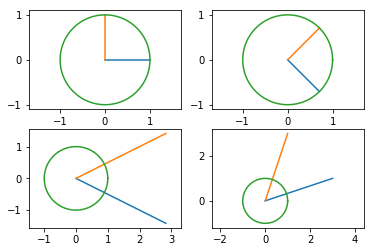

In [247]:
A=np.array([[3,1],[1,3]])
U,Sigma,V=truncated_svd(A)
e=np.array([[1,0],[0,1]])

t = np.linspace(0, 2*np.pi, 200)
theta=0.5
e1=np.array([1,0])
e2=np.array([0,1])
plt.subplot(221)
plt.plot([0,e1[0]],[0,e1[1]])
plt.plot([0,e2[0]],[0,e2[1]])
plt.plot(np.cos(t),np.sin(t))
plt.axis("equal")

plt.subplot(222)
f1,f2=np.dot(e1,V), np.dot(e2,V)
plt.plot([0,f1[0]],[0,f1[1]])
plt.plot([0,f2[0]],[0,f2[1]])
plt.plot(np.cos(t),np.sin(t))
plt.axis("equal")

plt.subplot(223)
g1,g2=np.dot(f1,Sigma.T), np.dot(f2,Sigma.T)
plt.plot([0,g1[0]],[0,g1[1]])
plt.plot([0,g2[0]],[0,g2[1]])
plt.plot(np.cos(t),np.sin(t))
plt.axis("equal")

plt.subplot(224)
h1,h2=np.dot(g1,U.T), np.dot(g2,U.T)
plt.plot([0,h1[0]],[0,h1[1]])
plt.plot([0,h2[0]],[0,h2[1]])
plt.plot(np.cos(t),np.sin(t))
plt.axis("equal")
plt.show()



# Problem 3

In [261]:
def svd_approx(A,k):
    U,S,Vh=la.svd(A, full_matrices=False)
    S=np.diag(S[:k])
    Ahat=U[:,:k].dot(S).dot(Vh[:k,:])
    return Ahat, la.norm(Ahat-A)
A=np.random.randn(4,5)



(array([[ 0.32720062, -0.22386702,  0.24005562,  0.8861132 ],
        [-0.40498711, -0.87913732,  0.21453547, -0.13068111],
        [-0.46767709, -0.03558783, -0.79738626,  0.37971937],
        [-0.71428519,  0.41920716,  0.51041453,  0.23138504]]),
 array([ 1.97604414,  1.64833567,  1.00995299,  0.49577563]),
 array([[-0.15662509,  0.59447366, -0.37750889, -0.32562126,  0.61116895],
        [ 0.52768135,  0.55100343, -0.00718141,  0.64343536, -0.06234562],
        [ 0.71754336, -0.47642403, -0.29346539, -0.14613738,  0.38816697],
        [-0.19837821, -0.11902227, -0.87684763,  0.21999679, -0.35947104],
        [-0.377887  , -0.31913966,  0.04951528,  0.64047405,  0.58539945]]))

# Problem 4

In [272]:
def lowest_rank_approx(A,e):
    U,S,Vh=la.svd(A,full_matrices=False)
    s=0
    while svd_approx(A,s)[1]>e:
        s+=1
    return s
lowest_rank_approx(A,1e-3)

3

# Problem 5

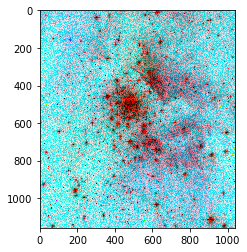

In [314]:
def compress_img(filename,k):
    X=plt.imread(filename).astype(float)
    X1=plt.imread(filename)[0,:,:].astype(float)
    X2=plt.imread(filename)[:,0,:].astype(float)
    X3=plt.imread(filename)[:,:,0].astype(float)
    Y1=svd_approx(X1,k)[0]
    Y2=svd_approx(X2,k)[0]
    Y3=svd_approx(X3,k)[0]
    X[0,:,:]=Y1
    X[:,0,:]=Y2
    X[:,:,0]=Y3
    return X
X=compress_img('hubble.jpg',20)
plt.imshow(X,cmap='gray')
plt.show()